In [13]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_json("exps.jsonl", lines=True)
mask = (df["params.dataset.path"] == "bdsaglam/drop-musique-mini") & (df["params.qa.model"].str.contains("70b"))
df = df[mask].copy()
print(len(df))
df.head()

120


,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,9383a2592f931d3ab62f12bd9e0762a4afe403fb,951e866aa22f882a955257af5cf28abfa3eb8c92,tutti-rale,bdsaglam/drop-musique-mini,default,validation,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,42,2030.214286,1835.654300,848,1293.50,1517.5,1900.00,10683,REASONING-SC(5),empty:icq-format-drop:drop/reasoning
1,9383a2592f931d3ab62f12bd9e0762a4afe403fb,5ff24fc9d317f410a57700aadb91872053ddae9e,zippy-ears,bdsaglam/drop-musique-mini,default,validation,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,41,1651.341463,828.334733,900,1195.00,1365.0,1778.00,5112,REASONING-SC(5),empty:icq-format-drop:drop/reasoning
2,9383a2592f931d3ab62f12bd9e0762a4afe403fb,5b4f051756fedcb4397a68871b99ea72fa06c8da,peart-he'd,bdsaglam/drop-musique-mini,default,validation,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,47,356.148936,364.003164,112,201.50,311.0,384.50,2657,REASONING,empty:icq-format-drop:drop/reasoning
3,9383a2592f931d3ab62f12bd9e0762a4afe403fb,a5d52619eb00df6562c3cb5f423ae65cf60a3db2,ocher-body,bdsaglam/drop-musique-mini,default,validation,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,40,321.675000,153.708580,137,228.75,264.5,377.75,829,REASONING,empty:icq-format-drop:drop/reasoning
4,9383a2592f931d3ab62f12bd9e0762a4afe403fb,9c2204a6ad086ba01011ce6f770c8af2cd00693f,tonal-cogs,bdsaglam/drop-musique-mini,default,validation,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,41,452.756098,539.681007,160,222.00,281.0,381.00,2738,REASONING,empty:icq-format-drop:drop/reasoning


In [15]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [16]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.top_p",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,commit,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,9383a2592f931d3ab62f12bd9e0762a4afe403fb,catty-nims,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,0,1,...,43,383.697674,285.319164,168,252.50,302.0,354.00,1654,REASONING,empty:icq-format-drop:drop/reasoning
1,9383a2592f931d3ab62f12bd9e0762a4afe403fb,anile-zoon,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,0,1,...,42,391.190476,414.467230,174,228.75,286.5,355.25,2801,REASONING,empty:icq-format-drop:drop/reasoning
2,9383a2592f931d3ab62f12bd9e0762a4afe403fb,tonal-cogs,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,0,1,...,41,452.756098,539.681007,160,222.00,281.0,381.00,2738,REASONING,empty:icq-format-drop:drop/reasoning
3,9383a2592f931d3ab62f12bd9e0762a4afe403fb,about-size,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,1,1,...,40,342.175000,219.334762,127,248.50,290.0,359.75,1495,REASONING,empty:icq-format-drop:drop/reasoning
4,9383a2592f931d3ab62f12bd9e0762a4afe403fb,focal-gonk,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,1,1,...,38,359.605263,238.394238,147,236.25,280.5,375.00,1306,REASONING,empty:icq-format-drop:drop/reasoning


In [17]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
9,"(typic-snot, molar-good, grave-fool)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,1,0.030000,0.551902
13,"(weest-daws, truer-trio, washy-hake)",llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,1,0.030000,0.549307
5,"(tough-sine, surgy-dops, jowly-odor)",deepseek-r1-llama-70b,0.5,0.950,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,1,0.026667,0.541446
0,"(catty-nims, anile-zoon, tonal-cogs)",deepseek-r1-llama-70b,0.5,0.950,REASONING,empty:icq-format-drop:drop/reasoning,0,0.016667,0.530684
19,"(non-U-shes, riven-seed, young-peba)",llama-3.3-70b,0.0,0.999,DIRECT,direct/format-few-drop:cq:drop/direct,5,0.020000,0.517186
37,"(livid-weft, erect-salt, heigh-mime)",llama-3.3-70b,0.5,0.950,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,1,0.020000,0.510016


In [18]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
5,deepseek-r1-llama-70b,0.5,0.95,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,1,"(tough-sine, surgy-dops, jowly-odor)",0.026667,0.541446
7,deepseek-r1-llama-70b,0.5,0.95,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,5,"(ovoid-scow, runic-apex, awing-cedi)",0.020000,0.539630
6,deepseek-r1-llama-70b,0.5,0.95,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,3,"(miffy-hobo, zippy-ears, basic-dona)",0.020000,0.535948
4,deepseek-r1-llama-70b,0.5,0.95,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,0,"(tutti-rale, beery-sinh, loamy-puke)",0.020000,0.532030
0,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:icq-format-drop:drop/reasoning,0,"(catty-nims, anile-zoon, tonal-cogs)",0.016667,0.530684
1,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:icq-format-drop:drop/reasoning,1,"(about-size, focal-gonk, genal-male)",0.020000,0.528902
3,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:icq-format-drop:drop/reasoning,5,"(legal-tass, olive-scut, snide-sing)",0.023333,0.525739
2,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:icq-format-drop:drop/reasoning,3,"(busty-tilt, ocher-body, peart-he'd)",0.013333,0.515018


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
9,llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,1,"(typic-snot, molar-good, grave-fool)",0.030000,0.551902
25,llama-3.3-70b,0.5,0.950,CCOT,ccot/format-thought-drop:cq:drop/ccot,1,"(licht-vlei, oiled-runs, acred-tors)",0.030000,0.550164
13,llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,1,"(weest-daws, truer-trio, washy-hake)",0.030000,0.549307
8,llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(score-rube, stiff-ibex, mirky-lahs)",0.026667,0.546406
29,llama-3.3-70b,0.5,0.950,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,1,"(quiet-unau, waspy-agma, funky-cyma)",0.030000,0.545180
12,llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,"(yummy-tell, tipsy-mays, trial-puke)",0.030000,0.545022
24,llama-3.3-70b,0.5,0.950,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(campy-rise, bosom-slue, vocal-lien)",0.026667,0.543659
28,llama-3.3-70b,0.5,0.950,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,"(broad-coof, misty-nibs, riled-smut)",0.030000,0.541528
14,llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,3,"(leady-daks, bluff-plow, godly-weft)",0.030000,0.540390
27,llama-3.3-70b,0.5,0.950,CCOT,ccot/format-thought-drop:cq:drop/ccot,5,"(hardy-bang, testy-buck, larky-cuds)",0.023333,0.540141


In [19]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
8,"(score-rube, stiff-ibex, mirky-lahs)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,0.026667,0.546406
12,"(yummy-tell, tipsy-mays, trial-puke)",llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,0.030000,0.545022
4,"(tutti-rale, beery-sinh, loamy-puke)",deepseek-r1-llama-70b,0.5,0.950,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,0,0.020000,0.532030
0,"(catty-nims, anile-zoon, tonal-cogs)",deepseek-r1-llama-70b,0.5,0.950,REASONING,empty:icq-format-drop:drop/reasoning,0,0.016667,0.530684
16,"(oaten-sena, stony-paps, milky-weld)",llama-3.3-70b,0.0,0.999,DIRECT,direct/format-few-drop:cq:drop/direct,0,0.010000,0.508882
20,"(dowie-coof, unlet-keek, oaten-loup)",llama-3.3-70b,0.0,0.999,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,0,0.010000,0.502456


In [20]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
9,"(typic-snot, molar-good, grave-fool)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,1,0.030000,0.551902
13,"(weest-daws, truer-trio, washy-hake)",llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,1,0.030000,0.549307
5,"(tough-sine, surgy-dops, jowly-odor)",deepseek-r1-llama-70b,0.5,0.950,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,1,0.026667,0.541446
1,"(about-size, focal-gonk, genal-male)",deepseek-r1-llama-70b,0.5,0.950,REASONING,empty:icq-format-drop:drop/reasoning,1,0.020000,0.528902
33,"(glued-delf, flash-vang, shoal-rain)",llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,1,0.020000,0.515347
37,"(livid-weft, erect-salt, heigh-mime)",llama-3.3-70b,0.5,0.950,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,1,0.020000,0.510016


In [21]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

In [22]:
model = 'llama-3-8b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1600x0 with 0 Axes>

In [11]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


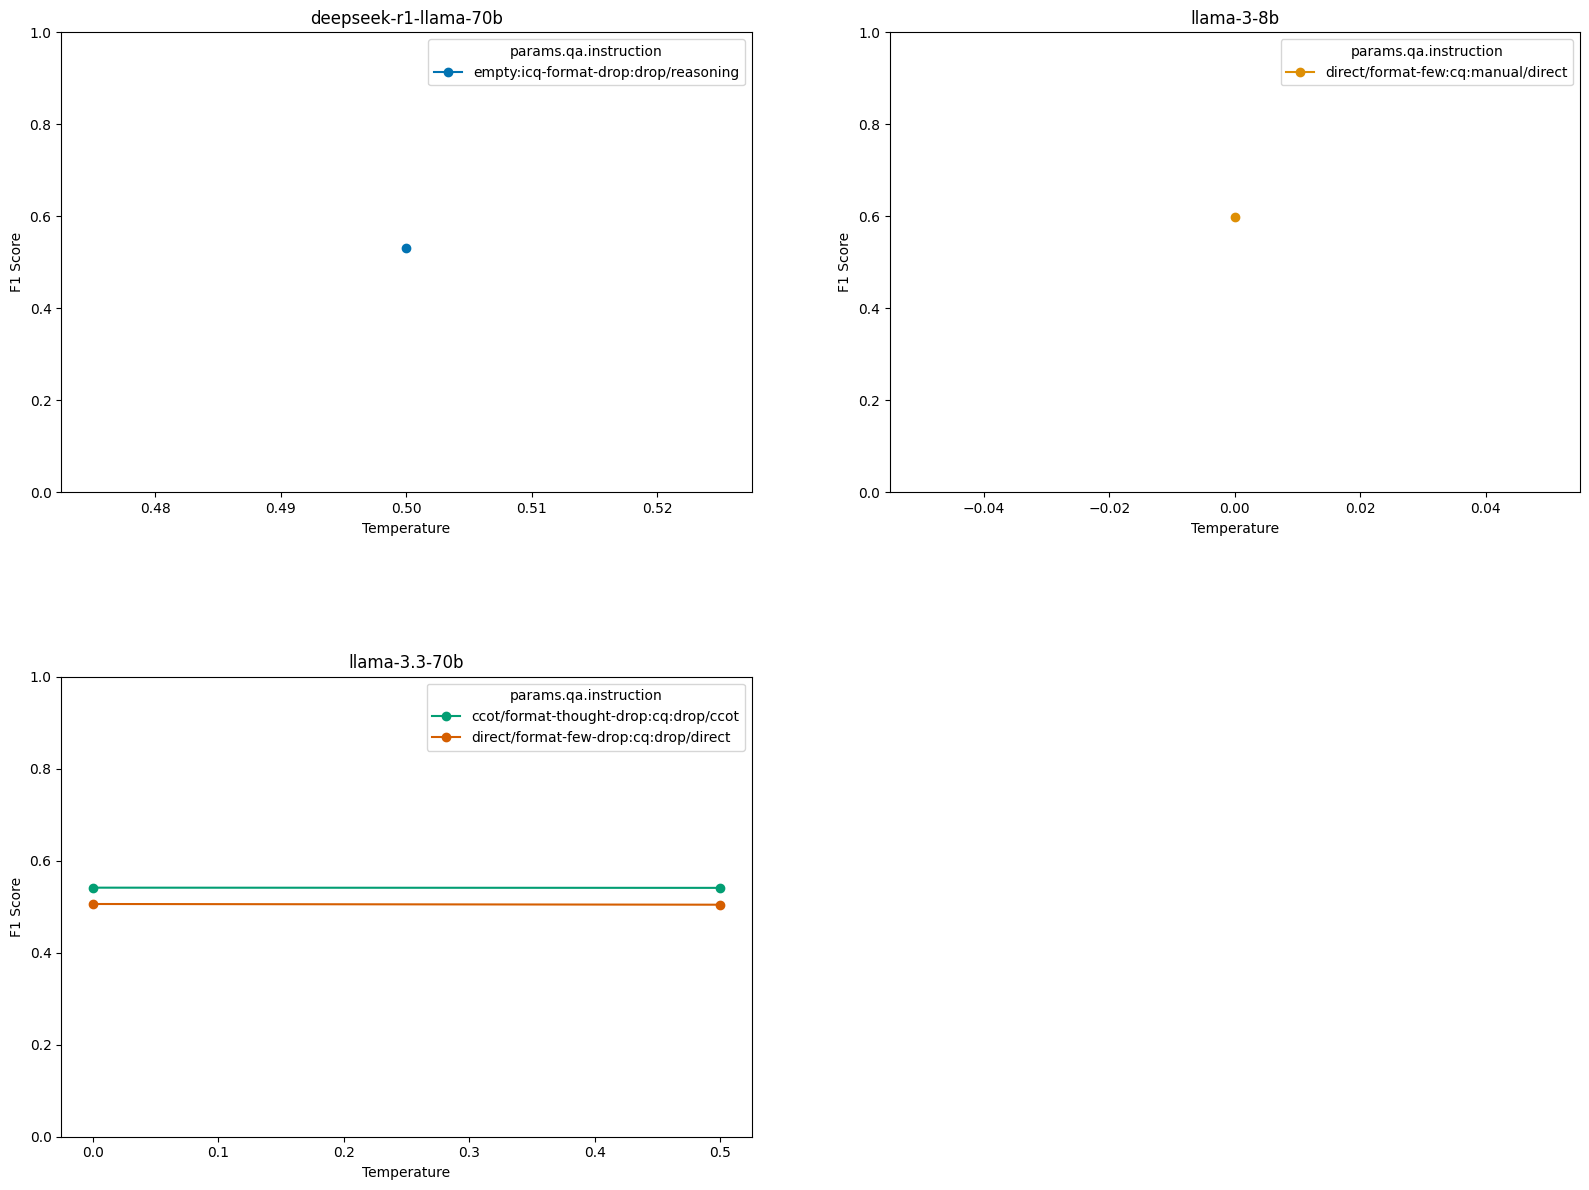

In [ ]:
compare_grid(df)